Introdução

---


Agora que você sabe como acessar e examinar um conjunto de dados, está pronto para escrever sua primeira consulta SQL! Como você verá em breve, as consultas SQL o ajudarão a classificar um enorme conjunto de dados, para recuperar apenas as informações de que você precisa.

Começaremos usando as palavras-chave SELECT, FROM e WHERE para obter dados de colunas específicas com base nas condições que você especificar.

Para maior clareza, trabalharemos com um pequeno conjunto de dados imaginário pet_records que contém apenas uma tabela, chamada pets.

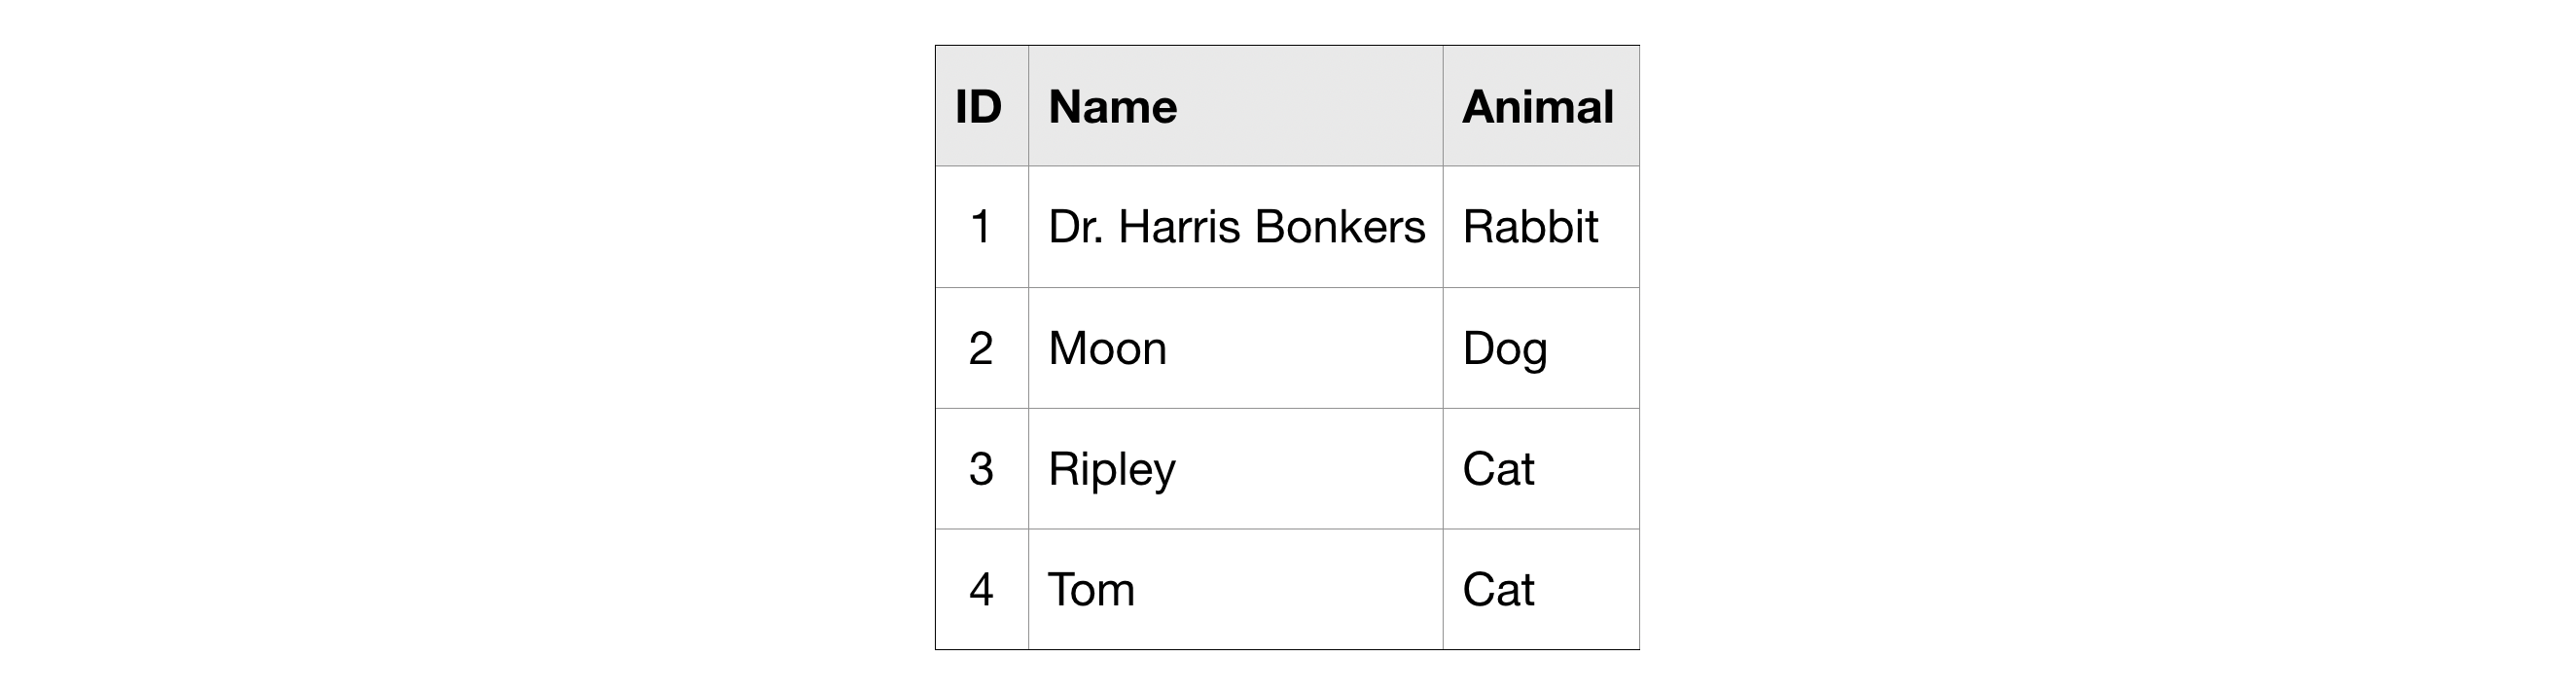

# SELECT FROM

---


A consulta SQL mais básica seleciona uma única coluna de uma única tabela. Para fazer isso,

especifique a coluna desejada após a palavra SELECT e, em seguida,
especifique a tabela após a palavra FROM.
Por exemplo, para selecionar a coluna Name (da tabela pets no banco de dados pet_records no projeto bigquery-public-data), nossa consulta apareceria da seguinte forma:

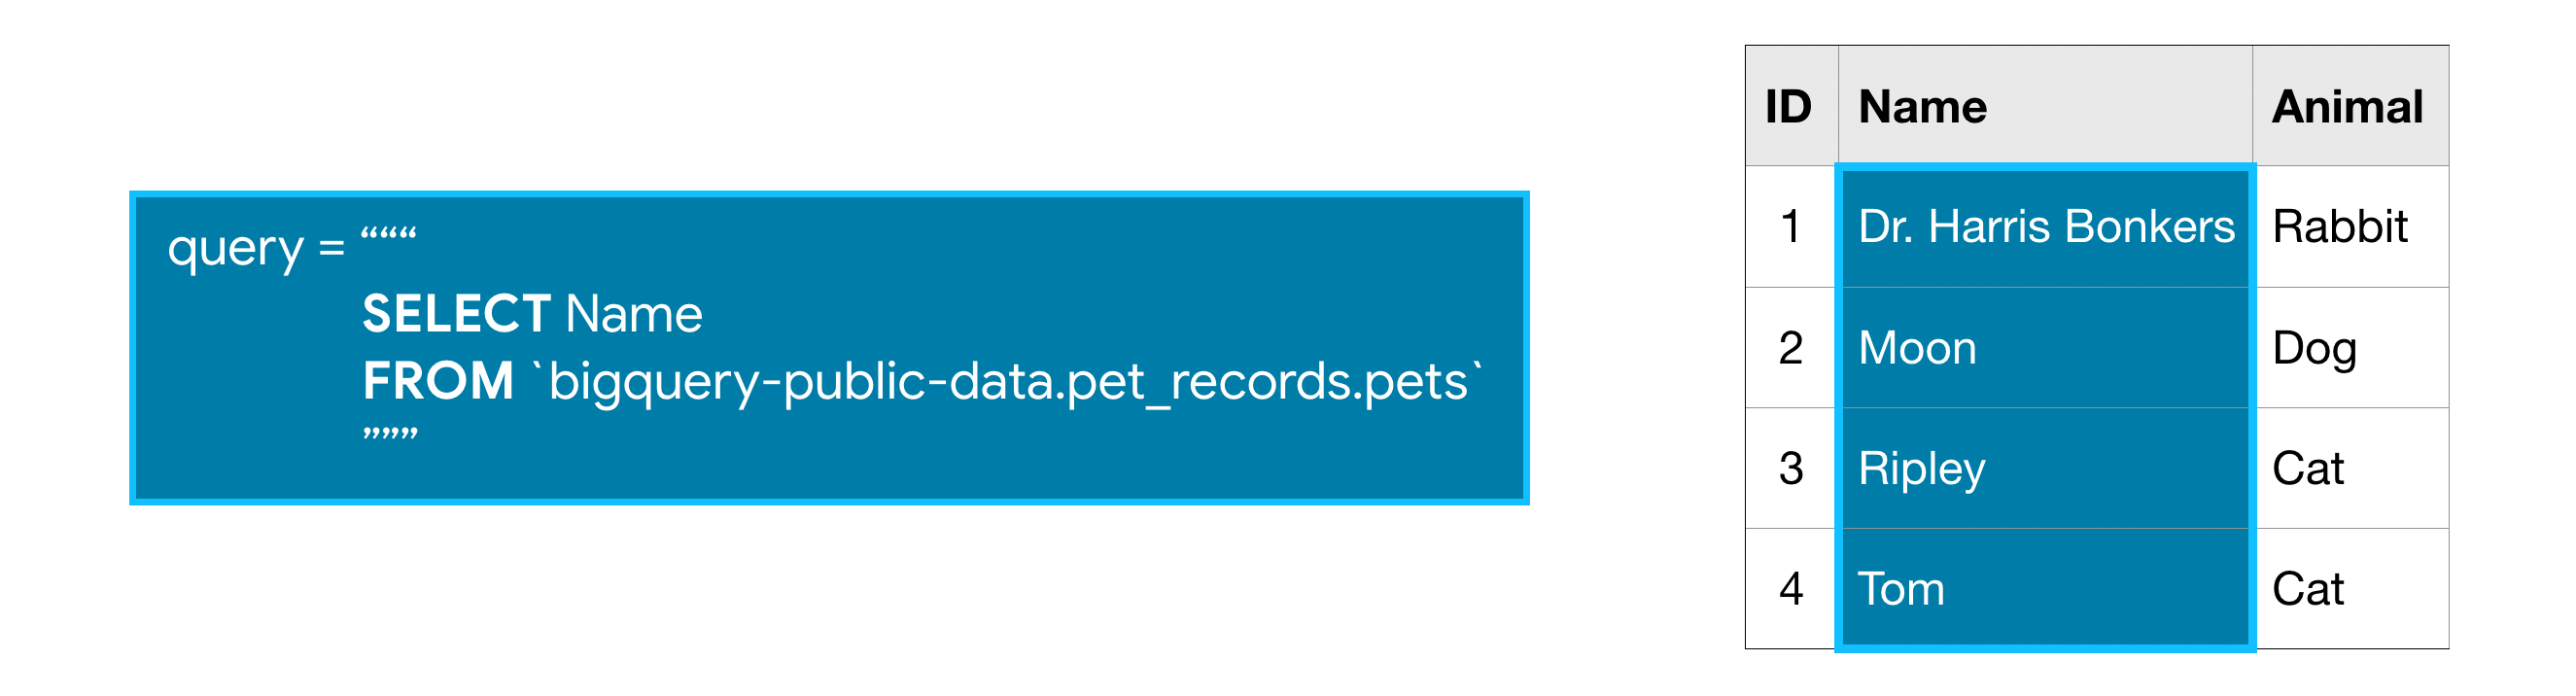

Observe que ao escrever uma consulta SQL, o argumento que passamos para FROM não está entre aspas simples ou duplas (' ou "). Está entre acentos graves (`).

# WHERE

---


Os conjuntos de dados do BigQuery são grandes, portanto, geralmente, você desejará retornar apenas as linhas que atendem a condições específicas. Você pode fazer isso usando a cláusula WHERE.

A consulta abaixo retorna as entradas da coluna Nome que estão nas linhas onde a coluna Animal tem o texto 'Gato'.

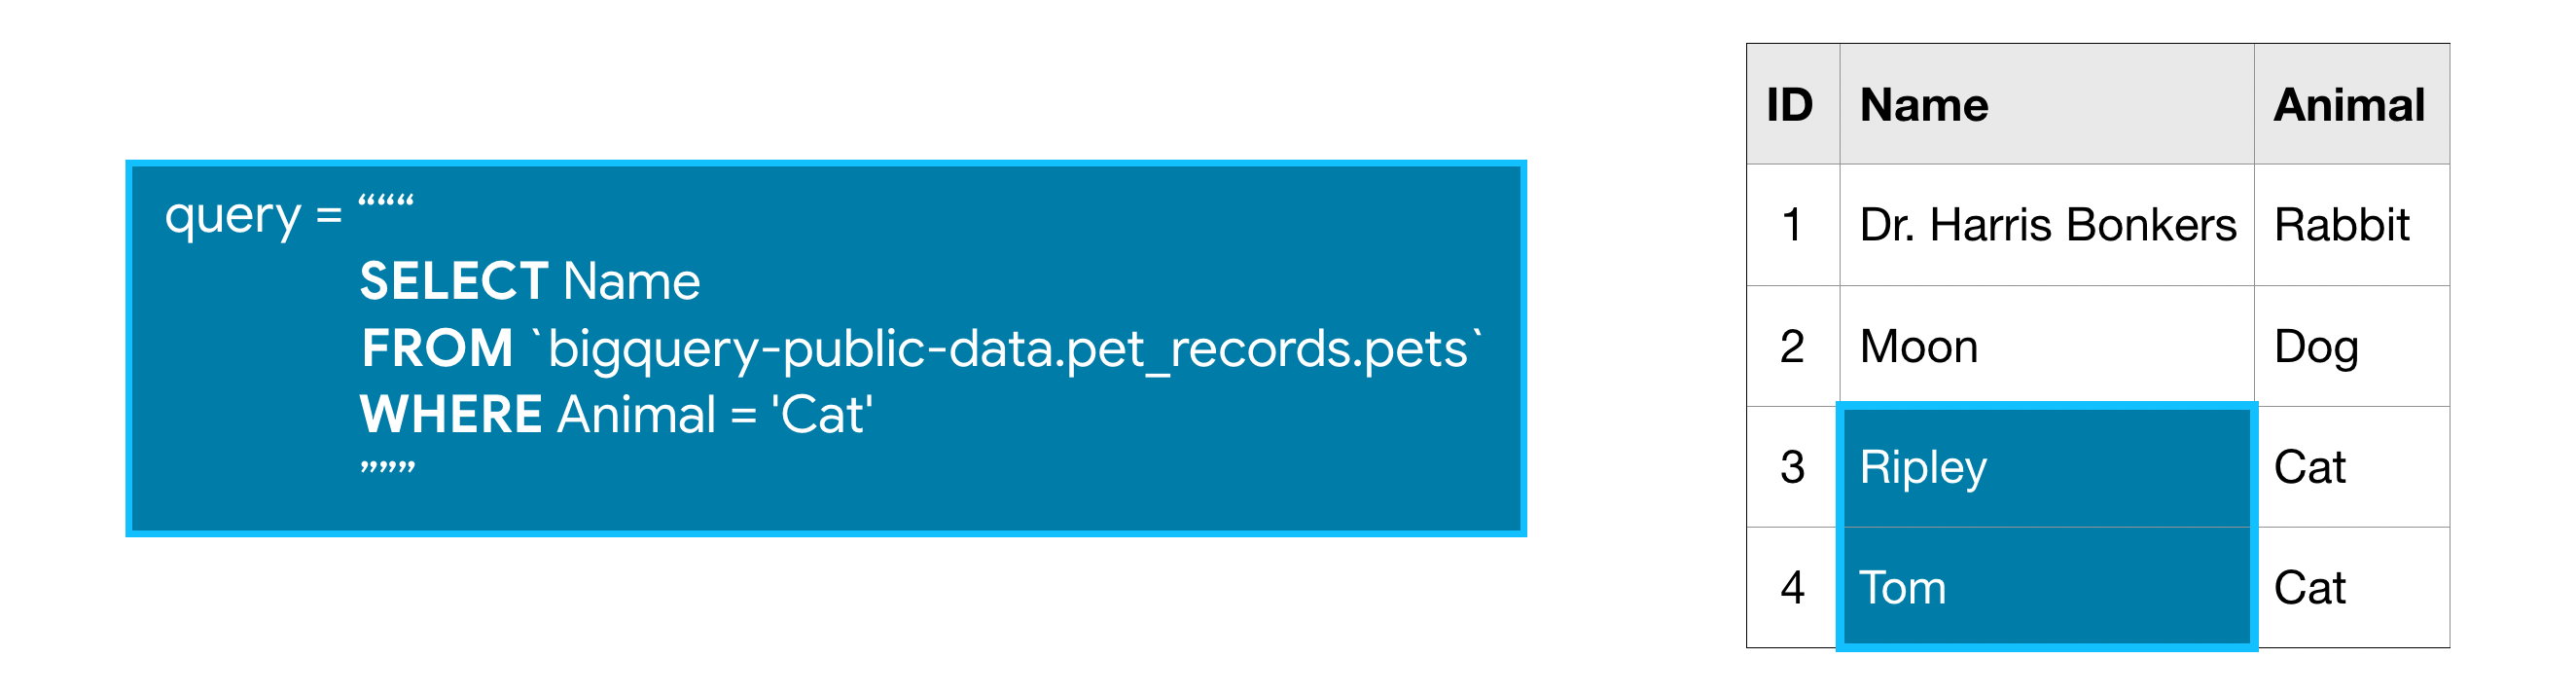

## Exemplo: Quais são todas as cidades dos EUA no conjunto de dados OpenAQ?

---


Agora que você aprendeu o básico, vamos trabalhar com um exemplo com um conjunto de dados real. Usaremos um conjunto de dados OpenAQ sobre qualidade do ar.

Primeiro, vamos configurar tudo o que precisamos para executar consultas e dar uma olhada rápida em quais tabelas estão em nosso banco de dados. (Como você aprendeu a fazer isso no tutorial anterior, ocultamos o código. Mas se você quiser dar uma olhada, basta clicar no botão "Código" abaixo.)

In [ ]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "openaq" dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# List all the tables in the "openaq" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there's only one!)
for table in tables:  
    print(table.table_id)

O conjunto de dados contém apenas uma tabela, chamada global_air_quality. Vamos buscar a tabela e dar uma olhada nas primeiras linhas para ver que tipo de dados ela contém. 

In [ ]:
# Construct a reference to the "global_air_quality" table
table_ref = dataset_ref.table("global_air_quality")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "global_air_quality" table
client.list_rows(table, max_results=5).to_dataframe()

Tudo parece bem! Então, vamos montar uma consulta. Digamos que queremos selecionar todos os valores da coluna cidade que estão nas linhas em que a coluna país é 'EUA' (para "Estados Unidos").

In [ ]:
# Query to select all the items from the "city" column where the "country" column is 'US'
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

Reserve um tempo agora para garantir que essa consulta esteja alinhada com o que você aprendeu acima.

## Como enviar a consulta ao conjunto de dados

---


Estamos prontos para usar essa consulta para obter informações do conjunto de dados OpenAQ. Como no tutorial anterior, o primeiro passo é criar um objeto Client.

In [ ]:
# Create a "Client" object
client = bigquery.Client()

Começamos configurando a consulta com o método query(). Executamos o método com os parâmetros padrão, mas esse método também nos permite especificar configurações mais complicadas sobre as quais você pode ler na documentação. Voltaremos a isso mais tarde.

In [ ]:
# Set up the query
query_job = client.query(query)

Em seguida, executamos a consulta e convertemos os resultados em um DataFrame pandas.

In [ ]:
# API request - run the query, and return a pandas DataFrame
us_cities = query_job.to_dataframe()

Agora temos um DataFrame pandas chamado us_cities, que podemos usar como qualquer outro DataFrame.

In [ ]:
# What five cities have the most measurements?
us_cities.city.value_counts().head()

## Mais consultas

---


Se você quiser várias colunas, poderá selecioná-las com uma vírgula entre os nomes:

In [ ]:
query = """
        SELECT city, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

Você pode selecionar todas as colunas com um * assim:

In [ ]:
query = """
        SELECT *
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """

## Perguntas e respostas: notas sobre formatação

---


A formatação da consulta SQL pode parecer estranha. Se você tiver alguma dúvida, você pode perguntar na seção de comentários na parte inferior desta página. Aqui estão as respostas para duas perguntas comuns:

### Pergunta: O que há com as aspas triplas (""")?

---


Resposta: Eles dizem ao Python que tudo dentro deles é uma única string, mesmo que tenhamos quebras de linha nela. As quebras de linha não são necessárias, mas facilitam a leitura da sua consulta.

---



### Pergunta: Você precisa capitalizar SELECT e FROM?

---


Resposta: Não, o SQL não se importa com a capitalização. No entanto, é comum colocar letras maiúsculas em seus comandos SQL e isso torna suas consultas um pouco mais fáceis de ler.